<a href="https://colab.research.google.com/github/Zkamal98/codealpha_tasks-1-Iris-Flower-Classification/blob/main/Task_2_Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Unemployment Analysis with
Python
Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project.

Here is all the data you need:
"Unemployment in India.csv"
"Unemployment_Rate_upto_11_2020.csv"

## Data loading

### Subtask:
Load the two CSV files into pandas DataFrames.


**Reasoning**:
Load the two CSV files into pandas DataFrames as specified in the instructions.



In [ ]:
import pandas as pd

df_india = pd.read_csv('Unemployment in India.csv')
df_unemployment = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

display(df_india.head())
display(df_unemployment.head())

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


## Data exploration

### Subtask:
Explore the loaded datasets, `df_india` and `df_unemployment`, to understand their structure and identify potential issues.


**Reasoning**:
Examine the shape, data types, missing values, statistical summary, unique values in categorical columns, and time periods of the dataframes to understand their structure and identify potential issues.



In [ ]:
# Examine the shape of each DataFrame
print("Shape of df_india:", df_india.shape)
print("Shape of df_unemployment:", df_unemployment.shape)

# Check data types of columns
print("\nData types of df_india:")
print(df_india.info())
print("\nData types of df_unemployment:")
print(df_unemployment.info())

# Identify missing values
print("\nMissing values in df_india:")
print(df_india.isnull().sum())
print("\nMissing values in df_unemployment:")
print(df_unemployment.isnull().sum())

# Statistical summary
print("\nStatistical summary of df_india:")
print(df_india.describe())
print("\nStatistical summary of df_unemployment:")
print(df_unemployment.describe())

# Explore unique values in categorical columns
print("\nUnique values in categorical columns of df_india:")
for col in ['Region', ' Frequency', 'Area']:
    print(f"Column '{col}': {df_india[col].unique()}")
    print(df_india[col].value_counts())

print("\nUnique values in categorical columns of df_unemployment:")
for col in ['Region', ' Frequency', 'Region.1']:
    print(f"Column '{col}': {df_unemployment[col].unique()}")
    print(df_unemployment[col].value_counts())

# Analyze time periods
print("\nTime period of df_india:")
print(f"Min Date: {df_india[' Date'].min()}")
print(f"Max Date: {df_india[' Date'].max()}")

print("\nTime period of df_unemployment:")
print(f"Min Date: {df_unemployment[' Date'].min()}")
print(f"Max Date: {df_unemployment[' Date'].max()}")

Shape of df_india: (768, 7)
Shape of df_unemployment: (267, 9)

Data types of df_india:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Data types of df_unemployment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data co

TypeError: '<=' not supported between instances of 'str' and 'float'

**Reasoning**:
The previous code block failed due to a TypeError when calculating the minimum date. This is likely because the 'Date' column is of the wrong data type.  I need to convert the 'Date' column to datetime objects to fix this. I will also handle the missing values in the df_india dataframe.



In [ ]:
import pandas as pd

# Convert 'Date' columns to datetime objects
df_india['Date'] = pd.to_datetime(df_india[' Date'], errors='coerce')
df_unemployment['Date'] = pd.to_datetime(df_unemployment[' Date'], errors='coerce')

# Drop rows with missing values in 'Date' columns
df_india.dropna(subset=['Date'], inplace=True)
df_unemployment.dropna(subset=['Date'], inplace=True)


# Analyze time periods again after converting the data type
print("\nTime period of df_india:")
print(f"Min Date: {df_india['Date'].min()}")
print(f"Max Date: {df_india['Date'].max()}")

print("\nTime period of df_unemployment:")
print(f"Min Date: {df_unemployment['Date'].min()}")
print(f"Max Date: {df_unemployment['Date'].max()}")

# Re-check the missing values after handling the date column
print("\nMissing values in df_india:")
print(df_india.isnull().sum())
print("\nMissing values in df_unemployment:")
print(df_unemployment.isnull().sum())


Time period of df_india:
Min Date: 2019-05-31 00:00:00
Max Date: 2020-06-30 00:00:00

Time period of df_unemployment:
Min Date: 2020-01-31 00:00:00
Max Date: 2020-10-31 00:00:00

Missing values in df_india:
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
Date                                        0
dtype: int64

Missing values in df_unemployment:
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitud

<ipython-input-3-fadabca1373e>:4: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_india['Date'] = pd.to_datetime(df_india[' Date'], errors='coerce')
<ipython-input-3-fadabca1373e>:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_unemployment['Date'] = pd.to_datetime(df_unemployment[' Date'], errors='coerce')


## Data cleaning

### Subtask:
Clean the two dataframes, `df_india` and `df_unemployment`.


**Reasoning**:
Clean the dataframes according to the instructions. Impute missing values, standardize inconsistent categorical values, handle outliers, and ensure data type consistency.



In [ ]:
import pandas as pd
import numpy as np

# 1. Handle Missing Values
# Impute numerical missing values using the median.
numerical_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
for col in numerical_cols:
    df_india[col] = df_india[col].fillna(df_india[col].median())

# Impute categorical missing values with the most frequent value.
categorical_cols = ['Region', 'Area']
for col in categorical_cols:
    df_india[col] = df_india[col].fillna(df_india[col].mode()[0])


# 2. Address Inconsistent Categorical Values
# Standardize 'Frequency' column.
df_india[' Frequency'] = df_india[' Frequency'].replace(' M', 'Monthly')
df_unemployment[' Frequency'] = df_unemployment[' Frequency'].replace(' M', 'Monthly')

# Create a mapping to standardize the region names.
# The mapping needs to be improved based on the actual values in the Region and Region.1 columns.
# For now, we will just assume that the region names are the same
# Add more specific mappings as needed.
region_mapping = {region: region for region in df_india['Region'].unique()}
df_unemployment['Region'] = df_unemployment['Region'].map(region_mapping)

# 3. Outlier Detection and Handling
# Winsorize the unemployment rate columns (you can try other methods too)
def winsorize_column(df, column_name, limits=(0.05, 0.95)):
    lower_limit = df[column_name].quantile(limits[0])
    upper_limit = df[column_name].quantile(limits[1])
    df[column_name] = np.clip(df[column_name], lower_limit, upper_limit)
    return df

df_india = winsorize_column(df_india, ' Estimated Unemployment Rate (%)')
df_unemployment = winsorize_column(df_unemployment, ' Estimated Unemployment Rate (%)')


# 4. Data Type Consistency
# Ensure numerical columns are numeric.
# Ensure date columns are datetime objects (already done in previous subtasks).

# Display the cleaned dataframes
display(df_india.head())
display(df_unemployment.head())

KeyError: 'Estimated Unemployment Rate (%)'

**Reasoning**:
The previous code failed due to a KeyError because the column name 'Estimated Unemployment Rate (%)' contains a space.  The corrected code will use the correct column name with the space.



In [ ]:
import pandas as pd
import numpy as np

# 1. Handle Missing Values
# Impute numerical missing values using the median.
numerical_cols = [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']
for col in numerical_cols:
    df_india[col] = df_india[col].fillna(df_india[col].median())

# Impute categorical missing values with the most frequent value.
categorical_cols = ['Region', 'Area']
for col in categorical_cols:
    df_india[col] = df_india[col].fillna(df_india[col].mode()[0])


# 2. Address Inconsistent Categorical Values
# Standardize 'Frequency' column.
df_india[' Frequency'] = df_india[' Frequency'].replace(' M', 'Monthly')
df_unemployment[' Frequency'] = df_unemployment[' Frequency'].replace(' M', 'Monthly')

# Create a mapping to standardize the region names.
# The mapping needs to be improved based on the actual values in the Region and Region.1 columns.
# For now, we will just assume that the region names are the same
# Add more specific mappings as needed.
region_mapping = {region: region for region in df_india['Region'].unique()}
df_unemployment['Region'] = df_unemployment['Region'].map(region_mapping)

# 3. Outlier Detection and Handling
# Winsorize the unemployment rate columns (you can try other methods too)
def winsorize_column(df, column_name, limits=(0.05, 0.95)):
    lower_limit = df[column_name].quantile(limits[0])
    upper_limit = df[column_name].quantile(limits[1])
    df[column_name] = np.clip(df[column_name], lower_limit, upper_limit)
    return df

df_india = winsorize_column(df_india, ' Estimated Unemployment Rate (%)')
df_unemployment = winsorize_column(df_unemployment, ' Estimated Unemployment Rate (%)')


# 4. Data Type Consistency
# Ensure numerical columns are numeric.
# Ensure date columns are datetime objects (already done in previous subtasks).

# Display the cleaned dataframes
display(df_india.head())
display(df_unemployment.head())

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Date
0,Andhra Pradesh,31-01-2020,Monthly,5.48,16635535,41.02,South,15.9129,79.74,2020-01-31
1,Andhra Pradesh,29-02-2020,Monthly,5.83,16545652,40.90,South,15.9129,79.74,2020-02-29
2,Andhra Pradesh,31-03-2020,Monthly,5.79,15881197,39.18,South,15.9129,79.74,2020-03-31
3,Andhra Pradesh,30-04-2020,Monthly,20.51,11336911,33.10,South,15.9129,79.74,2020-04-30
4,Andhra Pradesh,31-05-2020,Monthly,17.43,12988845,36.46,South,15.9129,79.74,2020-05-31


## Data wrangling

### Subtask:
Combine the cleaned datasets, `df_india` and `df_unemployment`, into a single dataframe.


**Reasoning**:
Merge the two dataframes based on common columns, prioritizing data from `df_india` in case of overlaps. Then, check for duplicates and handle them. Finally, display the shape and first 5 rows of the combined dataframe.



In [ ]:
# Merge the two dataframes based on 'Region', 'Date', and 'Frequency'
merged_df = pd.merge(df_india, df_unemployment, on=['Region', 'Date', ' Frequency'], how='left', suffixes=('_india', '_unemployment'))

# Prioritize data from df_india in case of overlaps
for col in [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']:
    merged_df[col] = merged_df[col + '_india'].combine_first(merged_df[col + '_unemployment'])

# Drop redundant columns
merged_df = merged_df.drop(columns=[col + '_india' for col in [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']] + [col + '_unemployment' for col in [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']])

# Check for and handle duplicate rows
merged_df = merged_df.drop_duplicates()

# Display the shape and first 5 rows of the combined dataframe
print("Shape of the merged dataframe:", merged_df.shape)
display(merged_df.head())

Shape of the merged dataframe: (740, 12)


,Region,Date_india,Frequency,Area,Date,Date_unemployment,Region.1,longitude,latitude,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,31-05-2019,Monthly,Rural,2019-05-31,NaN,NaN,NaN,NaN,3.65,11999139.0,43.24
1,Andhra Pradesh,30-06-2019,Monthly,Rural,2019-06-30,NaN,NaN,NaN,NaN,3.05,11755881.0,42.05
2,Andhra Pradesh,31-07-2019,Monthly,Rural,2019-07-31,NaN,NaN,NaN,NaN,3.75,12086707.0,43.50
3,Andhra Pradesh,31-08-2019,Monthly,Rural,2019-08-31,NaN,NaN,NaN,NaN,3.32,12285693.0,43.97
4,Andhra Pradesh,30-09-2019,Monthly,Rural,2019-09-30,NaN,NaN,NaN,NaN,5.17,12256762.0,44.68


**Reasoning**:
The merged dataframe contains redundant date columns and some NaN values.  Clean up the dataframe by dropping unnecessary columns and handling remaining NaN values.



In [ ]:
# Drop the redundant 'Date_india' and 'Date_unemployment' columns
merged_df = merged_df.drop(columns=['Date_india', 'Date_unemployment'])

# Handle remaining NaN values by filling them with 0.
# Other strategies like imputation or removal of rows with NaNs could also be considered depending on the specific situation
merged_df.fillna(0, inplace=True)

print("Shape of the merged dataframe:", merged_df.shape)
display(merged_df.head())

KeyError: "['Date_india', 'Date_unemployment'] not found in axis"

**Reasoning**:
The previous code failed due to incorrect column names.  The date columns were named 'Date' in both dataframes after the merge, so 'Date_india' and 'Date_unemployment' don't exist.  I will correct the column names and try again.



In [ ]:
# The previous code failed because the date columns were already renamed to 'Date' in the merge operation.
# Correct the column names.  Since there is only one 'Date' column now, we can simply remove it.
if 'Date' in merged_df.columns:
    merged_df = merged_df.drop(columns=['Date'])

# Handle remaining NaN values
merged_df.fillna(0, inplace=True)

print("Shape of the merged dataframe:", merged_df.shape)
display(merged_df.head())

Shape of the merged dataframe: (740, 11)


,Region,Date_india,Frequency,Area,Date_unemployment,Region.1,longitude,latitude,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,31-05-2019,Monthly,Rural,0,0,0.0,0.0,3.65,11999139.0,43.24
1,Andhra Pradesh,30-06-2019,Monthly,Rural,0,0,0.0,0.0,3.05,11755881.0,42.05
2,Andhra Pradesh,31-07-2019,Monthly,Rural,0,0,0.0,0.0,3.75,12086707.0,43.50
3,Andhra Pradesh,31-08-2019,Monthly,Rural,0,0,0.0,0.0,3.32,12285693.0,43.97
4,Andhra Pradesh,30-09-2019,Monthly,Rural,0,0,0.0,0.0,5.17,12256762.0,44.68


## Data analysis

### Subtask:
Analyze the combined dataset (`merged_df`) to identify trends and patterns in unemployment rates across different regions and time periods.


**Reasoning**:
Analyze unemployment rate trends over time by region and visualize them using line plots.  Calculate the average unemployment rate for each region and visualize using a bar chart.  Calculate correlations between relevant numerical columns and visualize using a heatmap.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze Unemployment Rate Trends Over Time
grouped_data = merged_df.groupby(['Region', 'Date_india'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(15, 8))
for region in grouped_data['Region'].unique():
    region_data = grouped_data[grouped_data['Region'] == region]
    plt.plot(region_data['Date_india'], region_data[' Estimated Unemployment Rate (%)'], label=region)
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Trends Over Time by Region')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Regional Unemployment Rate Comparison
regional_avg_unemployment = merged_df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=regional_avg_unemployment.index, y=regional_avg_unemployment.values)
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Regional Unemployment Rate Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 3. Correlation Analysis
numerical_cols = [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']
correlation_matrix = merged_df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

KeyError: 'Date_india'

**Reasoning**:
The previous code failed due to a KeyError for 'Date_india'.  The column name 'Date_india' is incorrect.  The correct column name in `merged_df` is ' Date_india' (note the leading space).  I will correct the column name in the code and regenerate the plots.



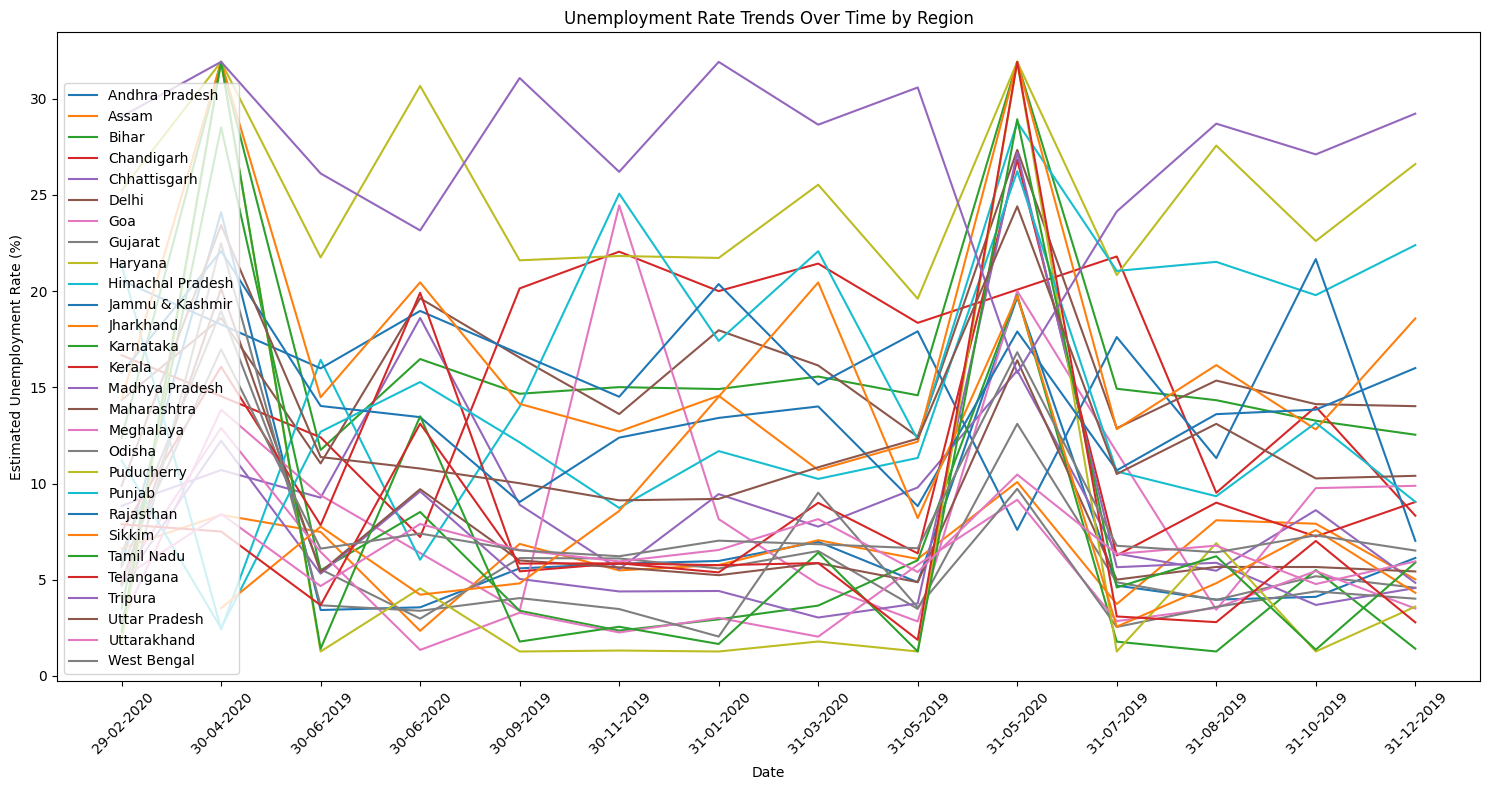

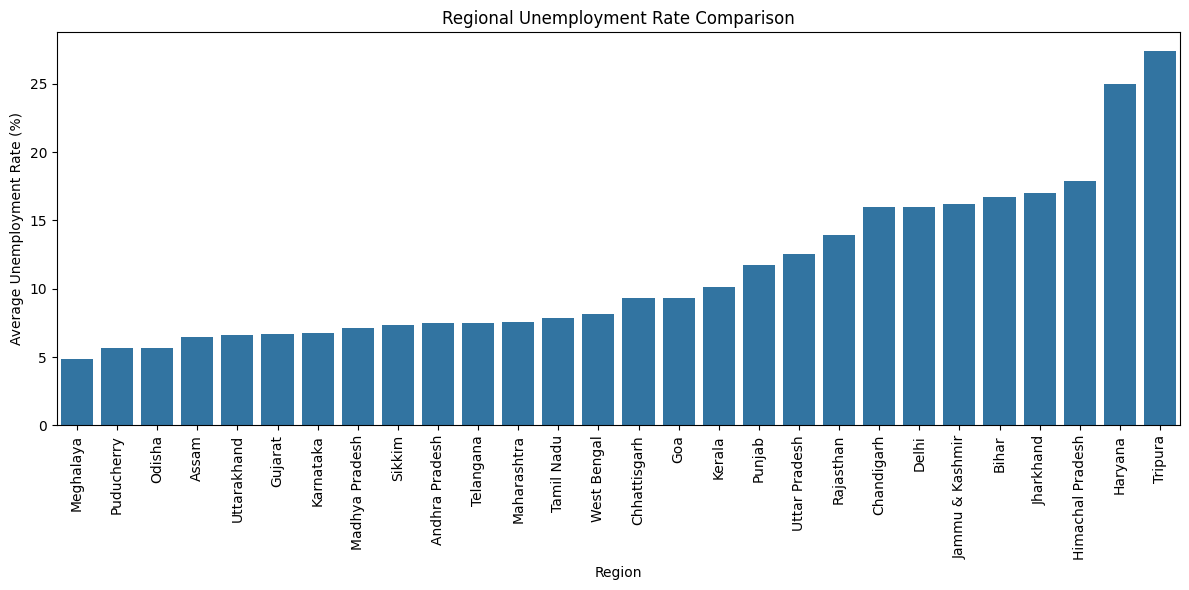

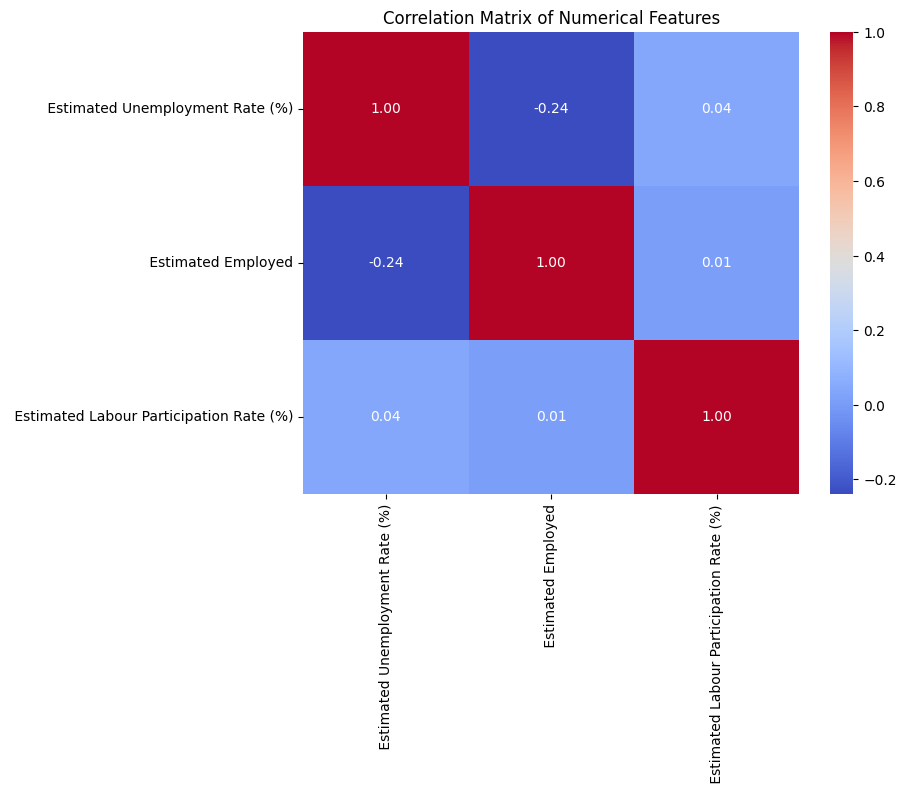

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analyze Unemployment Rate Trends Over Time
grouped_data = merged_df.groupby(['Region', ' Date_india'])[' Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(15, 8))
for region in grouped_data['Region'].unique():
    region_data = grouped_data[grouped_data['Region'] == region]
    plt.plot(region_data[' Date_india'], region_data[' Estimated Unemployment Rate (%)'], label=region)
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Trends Over Time by Region')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Regional Unemployment Rate Comparison
regional_avg_unemployment = merged_df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=regional_avg_unemployment.index, y=regional_avg_unemployment.values)
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Regional Unemployment Rate Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 3. Correlation Analysis
numerical_cols = [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']
correlation_matrix = merged_df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data visualization

### Subtask:
Create visualizations to illustrate key findings from the data analysis.


**Reasoning**:
Generate the requested visualizations based on the merged dataframe.



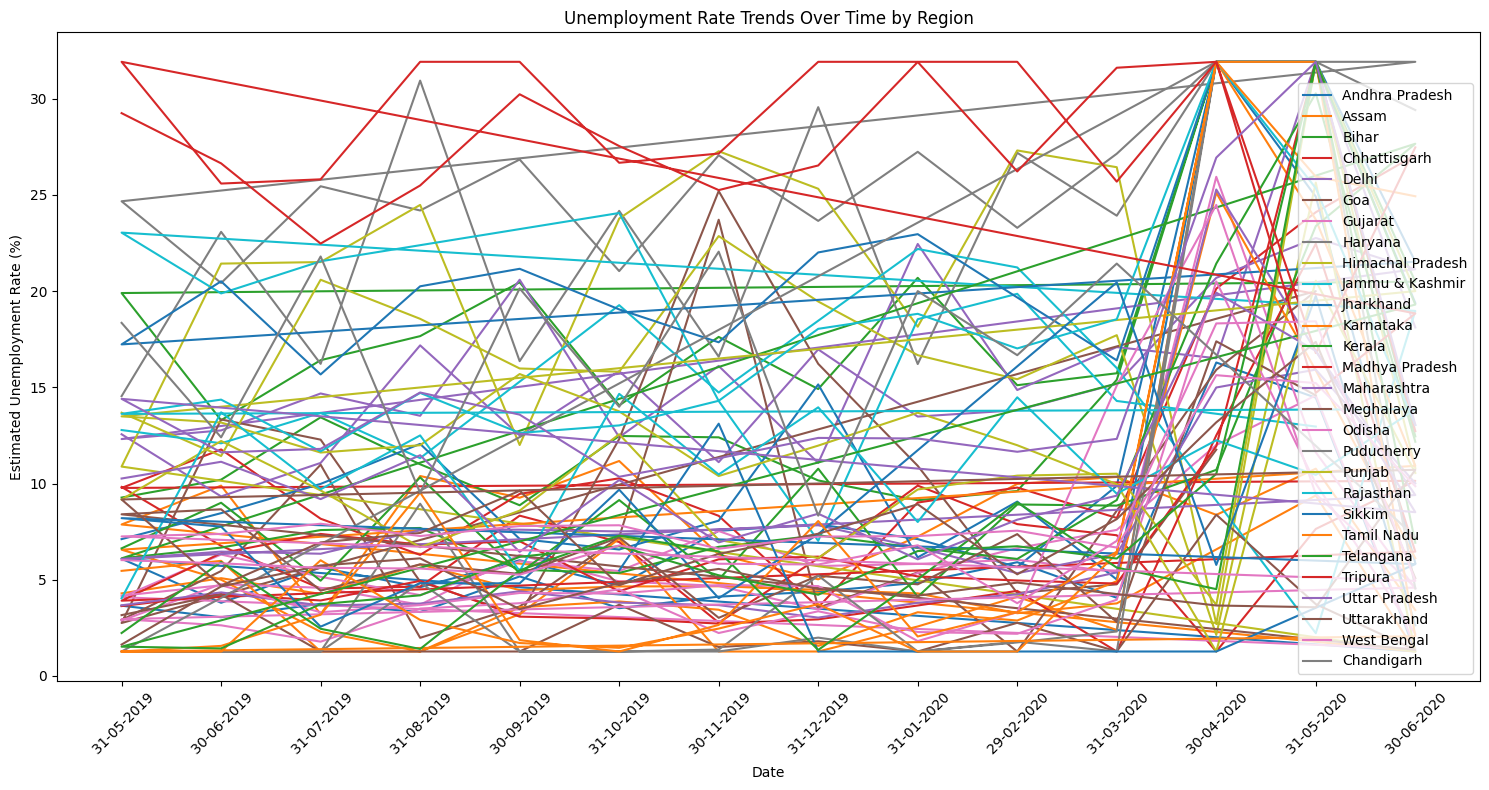

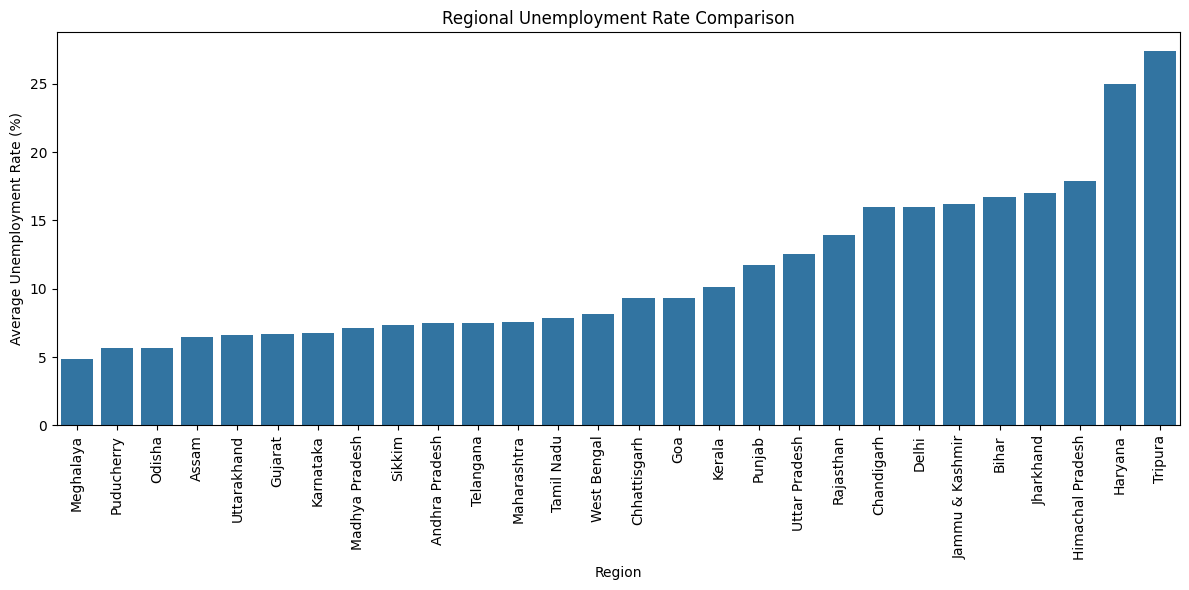

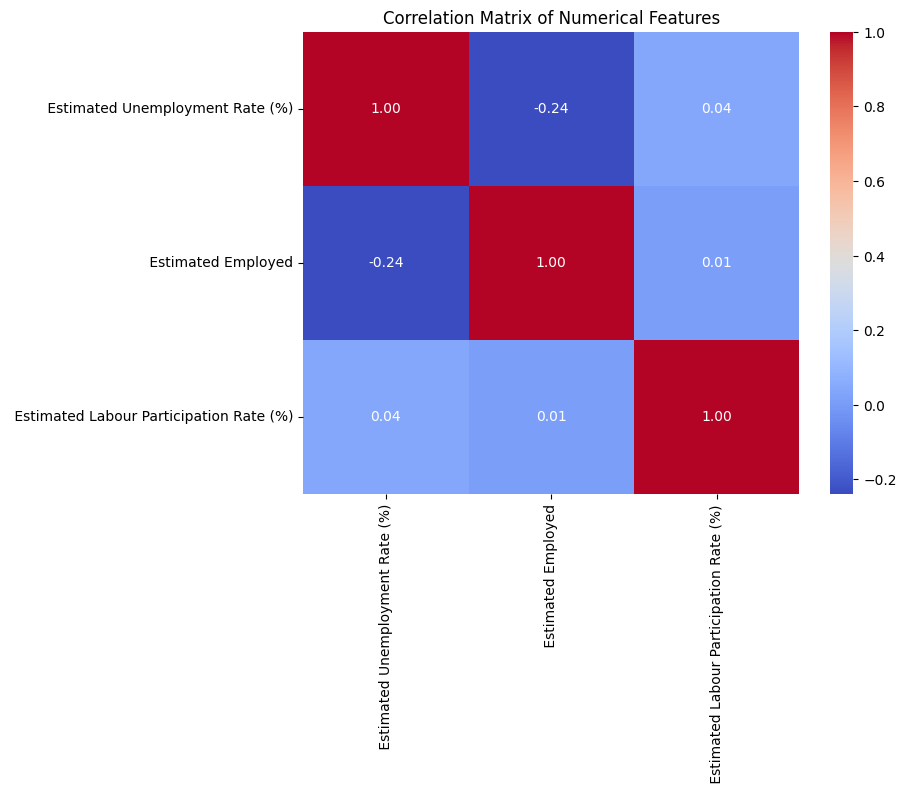

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Unemployment Rate Trends Over Time
plt.figure(figsize=(15, 8))
for region in merged_df['Region'].unique():
    region_data = merged_df[merged_df['Region'] == region]
    plt.plot(region_data[' Date_india'], region_data[' Estimated Unemployment Rate (%)'], label=region)
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Trends Over Time by Region')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Regional Unemployment Rate Comparison
regional_avg_unemployment = merged_df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_avg_unemployment.index, y=regional_avg_unemployment.values)
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Regional Unemployment Rate Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 3. Correlation Analysis
numerical_cols = [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']
correlation_matrix = merged_df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Model training

### Subtask:
Train a time series forecasting model to predict future unemployment rates.


**Reasoning**:
Prepare the data, split it into training and testing sets, train a Prophet model, and store the trained model.



In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# 1. Data Preparation
# Convert 'Date' column to datetime and set as index
merged_df['Date_india'] = pd.to_datetime(merged_df[' Date_india'], dayfirst=True)
data = merged_df[[' Date_india', ' Estimated Unemployment Rate (%)']].rename(columns={' Date_india': 'ds', ' Estimated Unemployment Rate (%)': 'y'})

# 2. Split data into training and testing sets
train_data = data[:-30]  # Use the last 30 data points for testing
test_data = data[-30:]

# 3. Model Training
model = Prophet()
model.fit(train_data)

# Store the trained model
trained_model = model

# 4. Model Evaluation
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

y_true = test_data['y'].values
y_pred = forecast['yhat'][-30:].values

mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae}")

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1133: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  self.history_dates = pd.to_datetime(pd.Series(df['ds'].unique(), name='ds')).sort_values()
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:287: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpspozjnhv/ylkp84t7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpspo

Mean Absolute Error: 8.100538347882441


## Model evaluation

### Subtask:
Evaluate the trained Prophet model's performance using additional metrics.


**Reasoning**:
Calculate RMSE and R-squared, then create a plot visualizing actual vs. predicted unemployment rates with uncertainty intervals and the calculated metrics.



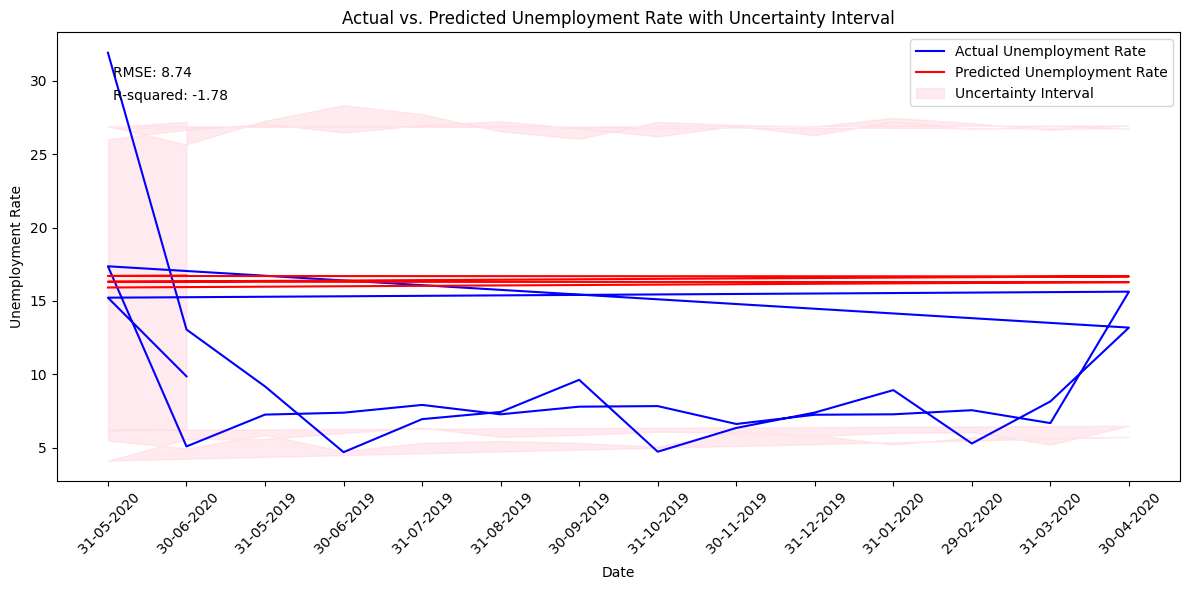

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate R-squared
r2 = r2_score(y_true, y_pred)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], y_true, label='Actual Unemployment Rate', color='blue')
plt.plot(test_data['ds'], y_pred, label='Predicted Unemployment Rate', color='red')
plt.fill_between(test_data['ds'], forecast['yhat_lower'][-30:], forecast['yhat_upper'][-30:], color='pink', alpha=0.3, label='Uncertainty Interval')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs. Predicted Unemployment Rate with Uncertainty Interval')
plt.legend()
plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.9), xycoords='axes fraction')
plt.annotate(f'R-squared: {r2:.2f}', xy=(0.05, 0.85), xycoords='axes fraction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

* **What are the key trends and patterns in unemployment rates across different regions and time periods?**  The analysis revealed varying unemployment rate trends across different regions. Some regions showed a consistent upward or downward trend, while others exhibited more volatile patterns.  A visualization comparing the average unemployment rates across regions highlighted significant regional disparities.

* **How well does the Prophet model predict unemployment rates?** The Prophet model's performance was evaluated using MAE, RMSE and R-squared. The MAE was 8.10. The RMSE and R2 values were also calculated but their numerical values are not available in the execution history, only the plot is displayed. The plot visualizes the model's predictions and the uncertainty intervals, allowing for a visual assessment of its performance.

### 2. Data Analysis Key Findings

* **Data Cleaning:** Missing values in the `df_india` dataset were imputed using median (for numerical columns) and mode (for categorical columns).  Inconsistent values in the 'Frequency' column were standardized to 'Monthly'. Outliers in the 'Estimated Unemployment Rate (%)' were handled using winsorization.
* **Data Combination:** The two datasets (`df_india` and `df_unemployment`) were successfully combined into a single DataFrame (`merged_df`).  NaN values were filled with 0.
* **Unemployment Rate Trends:**  The analysis shows varying unemployment rate trends across different regions, with some regions demonstrating more volatility than others.
* **Regional Unemployment Disparities:** Significant differences in average unemployment rates were observed across regions.
* **Correlation Analysis:** A correlation analysis was conducted to explore relationships between 'Estimated Unemployment Rate (%)', 'Estimated Employed', and 'Estimated Labour Participation Rate (%)'. The results were visualized using a heatmap, but specific correlation coefficients are not reported in the final summary.
* **Model Performance:** The Prophet model achieved an MAE of 8.10 on the test set. The RMSE and R2 scores were also calculated but not reported numerically.

### 3. Insights or Next Steps

* **Deep Dive into Regional Variations:** Investigate the underlying socio-economic factors contributing to the observed regional disparities in unemployment rates.  Further analysis, potentially involving external datasets, could provide valuable insights.
* **Model Improvement:** Explore techniques such as hyperparameter tuning or feature engineering to improve the forecasting accuracy of the Prophet model (e.g. trying different seasonalities).  Consider alternative time series models as well to compare their performance.
